In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

from statsmodels import tsa
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [99]:
print("Reading Data")
moldi = pd.read_csv("GI_Wall2_Mould_P5_A8_C.csv")
moldii = pd.read_csv("X_Wall2_Mould_P6_B3_C.csv")
print("Moldi")
print(moldi.head())
print(moldi.shape)

print("Moldii")
print(moldii.head())
print(moldii.shape)

Reading Data
Moldi
   Time   Temp     RH  Unnamed: 3  RHcrit  Mmax     k1        k2    Growth  \
0     0  14.05  95.54         NaN     NaN   NaN    NaN       NaN       NaN   
1     1  13.93  95.54         NaN    80.2   4.3  0.578  0.999954  0.002539   
2     2  13.86  95.54         NaN    80.2   4.3  0.578  0.999954  0.002531   
3     3  13.80  95.53         NaN    80.3   4.3  0.578  0.999954  0.002523   
4     4  13.74  95.53         NaN    80.3   4.3  0.578  0.999954  0.002516   

   Growth.1  dryTime  Recession         M       M.1  
0       NaN      NaN        NaN       NaN  0.000000  
1  0.001468      0.0        0.0  0.001468  0.001468  
2  0.001463      0.0        0.0  0.001463  0.002931  
3  0.001458      0.0        0.0  0.001458  0.004389  
4  0.001454      0.0        0.0  0.001454  0.005843  
(35017, 14)
Moldii
   Time     Temp       RH  Unnamed: 3  RHcrit  Mmax     k1   k2    Growth  \
0     0  14.9500  68.5533         NaN     NaN   NaN    NaN  NaN       NaN   
1     1  14.436

In [100]:
def cleanMoldDF(molddf):
    # Clean Data
    print("Cleaning Data")
    
    # drop columns
    molddf = molddf.drop(columns=["Unnamed: 3"])

    # convert data types, replace invalid values
    molddf["Mmax"].replace('#DIV/0!', "0", inplace=True)
    molddf["Mmax"] = molddf["Mmax"].astype("float64")

    molddf["k2"].replace('#DIV/0!', "0", inplace=True)
    molddf["k2"] = molddf["k2"].astype("float64")

    molddf["Growth"].replace('#NUM!', "0", inplace=True)
    molddf["Growth"] = molddf["Growth"].astype("float64")

    molddf["Growth.1"].replace('#NUM!', "0", inplace=True)
    molddf["Growth.1"] = molddf["Growth.1"].astype("float64")

    # moldi["Date"] = pd.to_datetime(moldi["Date"])

    # add new column: Time At Risk
    molddf["atRisk"] = 0
    for i in range(molddf.shape[0]):
        if molddf.at[i, "Recession"] == 0:
            if begin:
                x = molddf.at[i, "Time"]
                begin = False
            molddf.at[i, "atRisk"] = molddf.at[i, "Time"] - x
            continue
        begin = True
    # add new column M.1-1
    molddf["M.1-1"] = [(molddf.at[i-1, "M.1"]) if i != 0 else 0 for i in range(molddf.shape[0])]
    # add new column: RHdiff
    # molddf["RHdiff"] = [(molddf.at[r, "RH"] - molddf.at[r, "RHcrit"]) if r != (molddf.shape[0]-1) else 0 
    #                     for r in range(molddf.shape[0])]
    molddf["RHdiff"] = [(molddf.at[r, "RH"] - 80) if r != (molddf.shape[0]-1) else 0 
                         for r in range(molddf.shape[0])]

    # set index column as Time
    molddf = molddf.set_index('Time')

    print(molddf.head())
    print(molddf.shape)
    print(molddf.dtypes)
    return molddf

moldi = cleanMoldDF(moldi)
moldii = cleanMoldDF(moldii)
    

Cleaning Data
       Temp     RH  RHcrit  Mmax     k1        k2    Growth  Growth.1  \
Time                                                                    
0     14.05  95.54     NaN   NaN    NaN       NaN       NaN       NaN   
1     13.93  95.54    80.2   4.3  0.578  0.999954  0.002539  0.001468   
2     13.86  95.54    80.2   4.3  0.578  0.999954  0.002531  0.001463   
3     13.80  95.53    80.3   4.3  0.578  0.999954  0.002523  0.001458   
4     13.74  95.53    80.3   4.3  0.578  0.999954  0.002516  0.001454   

      dryTime  Recession         M       M.1  atRisk     M.1-1  RHdiff  
Time                                                                    
0         NaN        NaN       NaN  0.000000       0  0.000000   15.54  
1         0.0        0.0  0.001468  0.001468       0  0.000000   15.54  
2         0.0        0.0  0.001463  0.002931       1  0.001468   15.54  
3         0.0        0.0  0.001458  0.004389       2  0.002931   15.53  
4         0.0        0.0  0.001454  

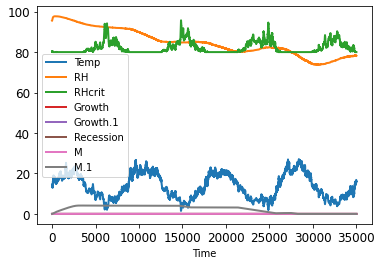

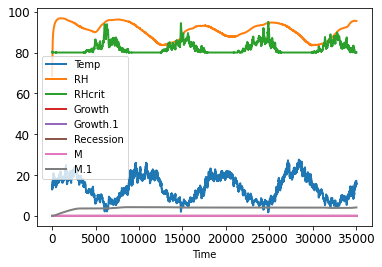

In [49]:
# plot

moldi.loc[:, ["Temp", "RH", "RHcrit", "Growth", "Growth.1", "Recession", "M", "M.1"]].plot(linewidth=2, fontsize=12)
plt.show()

moldii.loc[:, ["Temp", "RH", "RHcrit", "Growth", "Growth.1", "Recession", "M", "M.1"]].plot(linewidth=2, fontsize=12)
plt.show()

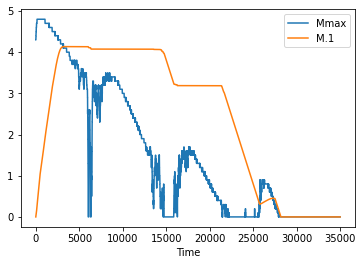

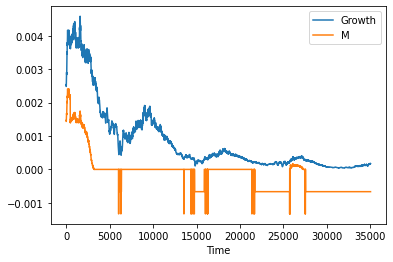

In [4]:
moldi.loc[:, ["Mmax", "M.1"]].plot()
plt.show()

moldi.loc[:, ["Growth", "M"]].plot()
plt.show()

In [87]:
moldi.describe()
moldi[moldi["Recession"] != 0].median()

Temp            8.476660
RH             78.188850
RHcrit         83.300000
Mmax            0.000000
k1              0.578000
k2              0.000000
Growth          0.000149
Growth.1        0.000000
dryTime      2494.000000
Recession      -0.000667
M              -0.000667
M.1             0.000000
atRisk          0.000000
M.1-1           0.000000
RHdiff         -4.261200
dtype: float64

In [6]:
moldii.describe()

,Temp,RH,RHcrit,Mmax,k1,k2,Growth,Growth.1,dryTime,Recession,M,M.1,atRisk,RHdiff
count,35017.000000,35017.000000,35016.00000,35016.000000,35016.000000,35016.000000,35016.000000,35016.000000,35016.000000,35016.000000,35016.000000,35017.000000,35017.000000,35016.000000
mean,13.543960,90.866031,81.97877,2.924517,0.390162,0.113628,0.001380,0.000130,0.972327,-0.000012,0.000118,3.873612,4646.000657,8.887458
std,5.780823,3.809781,2.69908,1.127012,0.027960,0.278117,0.000815,0.000359,8.836255,0.000100,0.000376,0.701321,3579.401401,4.415528
min,1.733360,68.430900,80.00000,0.000000,0.386000,0.000000,0.000024,0.000000,0.000000,-0.001333,-0.001333,0.000000,0.000000,-11.846600
25%,8.318450,88.076600,80.00000,2.300000,0.386000,0.000000,0.000792,0.000000,0.000000,0.000000,0.000000,3.894248,1575.000000,5.625400
50%,12.751700,91.545500,80.60000,3.200000,0.386000,0.000000,0.001189,0.000000,0.000000,0.000000,0.000000,4.086915,4032.000000,9.113850
75%,18.783300,93.910600,83.50000,3.800000,0.386000,0.000000,0.001860,0.000000,0.000000,0.000000,0.000000,4.095669,7185.000000,12.365800
max,27.549200,96.781000,95.00000,4.600000,0.578000,0.999869,0.004221,0.002074,152.000000,0.000000,0.002074,4.283002,13357.000000,16.781000


In [7]:

# from statsmodels.graphics.tsaplots import plot_acf,plot_pacfs
mendog = moldi.loc[:, ["RHcrit"]]
m2endog = moldi.loc[:, ["RHcrit"]]

mexog = moldii.loc[:, ["Temp"]]
m2exog = moldii.loc[:, ["Temp"]]

mArima = ARIMA(mendog, exog = mexog)
mResArima = mArima.fit()
print(mResArima.summary())

m2Arima = ARIMA(m2endog, exog = m2exog)
m2ResArima = m2Arima.fit()
print(m2ResArima.summary())

                               SARIMAX Results                                
Dep. Variable:                 RHcrit   No. Observations:                35017
Model:                          ARIMA   Log Likelihood              -66152.865
Date:                Thu, 14 Apr 2022   AIC                         132311.731
Time:                        20:01:16   BIC                         132337.122
Sample:                             0   HQIC                        132319.818
                              - 35017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.6303      0.022   4001.414      0.000      87.587      87.673
Temp          -0.4093      0.002   -271.138      0.000      -0.412      -0.406
sigma2         2.5614      0.019    135.821      0.0

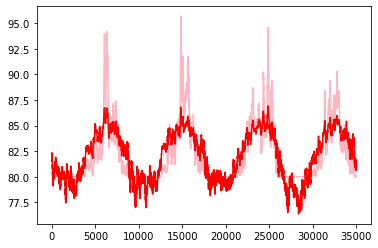

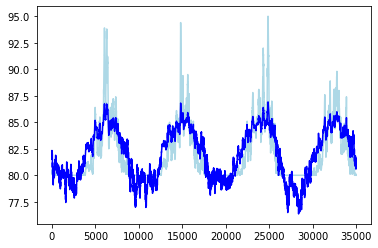

In [44]:
plt.plot(moldi.loc[:, ["RHcrit"]], color="lightpink")
plt.plot(mResArima.fittedvalues, color="red")
plt.show()
plt.plot(moldii.loc[:, ["RHcrit"]], color="lightblue")
plt.plot(m2ResArima.fittedvalues, color="blue")

In [15]:
miCorrMatrix = moldi.corr().abs()
miiCorrMatrix = moldii.corr().abs()

Moldi


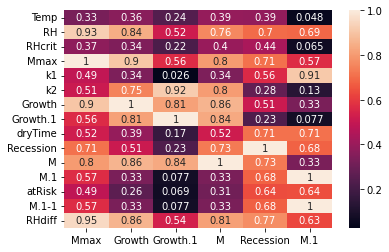

Moldii


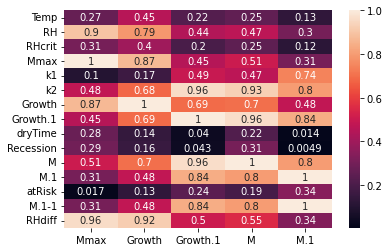

In [111]:
print("Moldi")
sns.heatmap(miCorrMatrix.loc[:, ["Mmax", "Growth", "Growth.1", "M", "Recession", "M.1"]], annot=True)
plt.show()

print("Moldii")
sns.heatmap(miiCorrMatrix.loc[:, ["Mmax", "Growth", "Growth.1", "M", "M.1"]], annot=True)
plt.show()

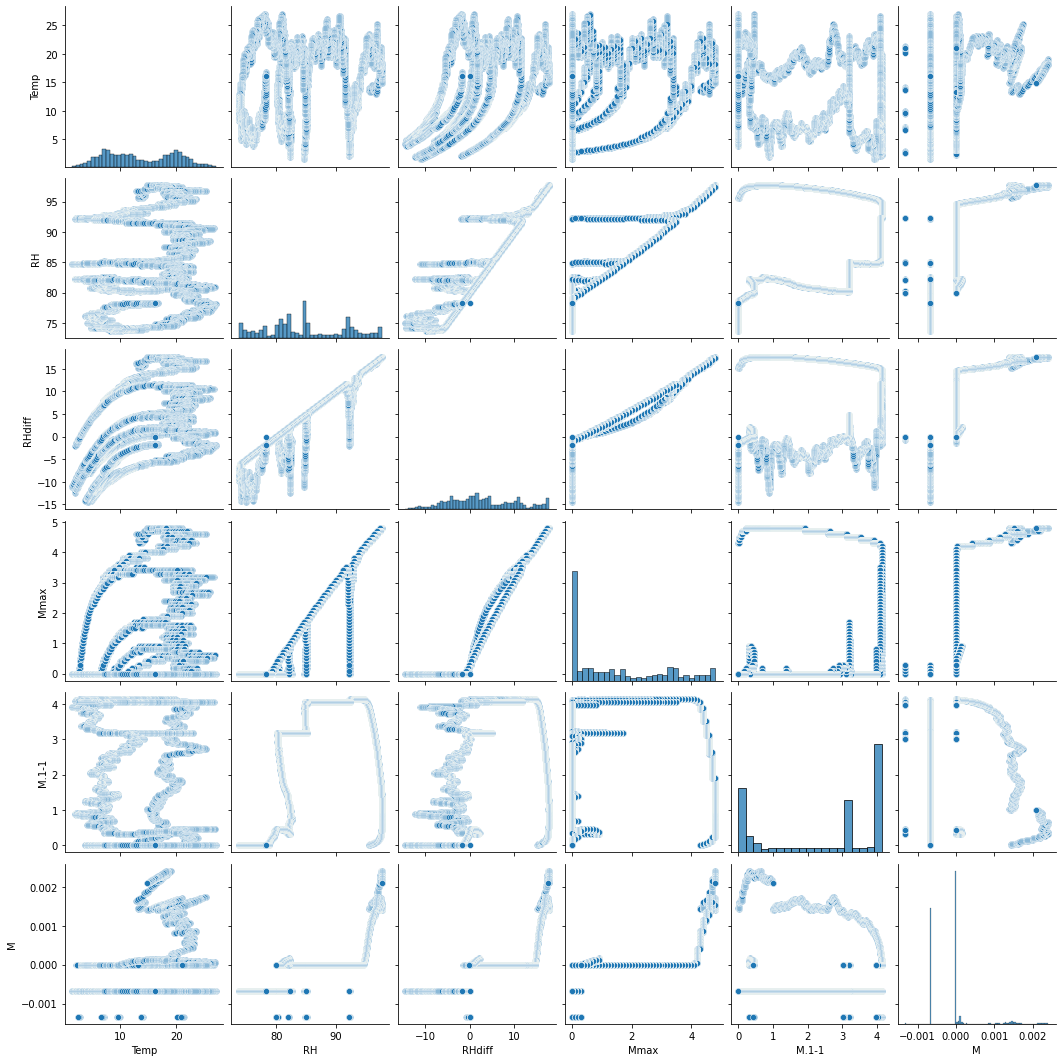

In [13]:
sns.pairplot(moldi.loc[:, ["Temp", "RH", "RHdiff", "Mmax", "M.1-1", "M"]])
plt.show()

In [101]:
X1 = moldi.loc[1:, ["Temp", "RH", "RHdiff"]]

In [102]:
y = moldi.loc[1:, "Mmax"]
trainX, testX, trainY, testY = train_test_split(X1, y, test_size=0.2, random_state=1234)

mimmLogR = LinearRegression().fit(trainX, trainY)
predmimmLR = mimmLogR.predict(testX)
mse = np.mean((predmimmLR - testY)**2)
print("Intercept: ", mimmLogR.intercept_)
print("Coefs: ", mimmLogR.coef_)
print("Score: ", mimmLogR.score(trainX, trainY))
print("R2: ", metrics.r2_score(testY, predmimmLR))
print("MSE: ", mse)

Intercept:  -25.418256483225235
Coefs:  [ 0.05042459  0.31468217 -0.09772977]
Score:  0.8950839806709318
R2:  0.8983114665900067
MSE:  0.25855109411070554


In [103]:
X = moldi.loc[1:, ["Mmax", "Growth", "Recession"]]

In [104]:
y = moldi.loc[1:, "M"]
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=1234)

mimLogR = LinearRegression().fit(trainX, trainY)
predmimLR = mimLogR.predict(testX)
mse = np.mean((predmimLR - testY)**2)
print("Intercept: ", mimLogR.intercept_)
print("Coefs: ", mimLogR.coef_)
print("Score: ", mimLogR.score(trainX, trainY))
print("R2: ", metrics.r2_score(testY, predmimLR))
print("MSE: ", mse)

Intercept:  -2.5074646155536125e-06
Coefs:  [-2.77059055e-04  6.90105936e-01  1.14164988e+00]
Score:  0.9128684557190754
R2:  0.9158176080791779
MSE:  2.752418503729479e-08


In [107]:
XwM = moldi.loc[1:, ["Growth", "Recession"]]
predXmimmLR = mimmLogR.predict(X1)
XwM["Mmax"] = predXmimmLR

In [108]:
y = moldi.loc[1:, "M"]
trainX, testX, trainY, testY = train_test_split(XwM, y, test_size=0.2, random_state=1234)

mimwmLogR = LinearRegression().fit(trainX, trainY)
predmimwmLR = mimwmLogR.predict(testX)
mse = np.mean((predmimwmLR - testY)**2)
print("Intercept: ", mimwmLogR.intercept_)
print("Coefs: ", mimwmLogR.coef_)
print("Score: ", mimwmLogR.score(trainX, trainY))
print("R2: ", metrics.r2_score(testY, predmimwmLR))
print("MSE: ", mse)

Intercept:  -3.499570614179045e-05
Coefs:  [ 5.79240840e-01  1.06375203e+00 -2.06571163e-04]
Score:  0.8901259622876582
R2:  0.892948883566977
MSE:  3.500131880218899e-08


In [34]:
y = moldi.loc[1:, "M.1"]
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=1234)

mim1LogR = LinearRegression().fit(trainX, trainY)
predmim1LR = mim1LogR.predict(testX)
mse = np.mean((predmim1LR - testY)**2)
print("Intercept: ", mim1LogR.intercept_)
print("Coefs: ", mim1LogR.coef_)
print("Score: ", mim1LogR.score(trainX, trainY))
print("R2: ", metrics.r2_score(testY, predmim1LR))
print("MSE: ", mse)

Intercept:  -23.996832320271945
Coefs:  [ 3.27151444e-02  3.19033385e-01  3.42718472e-02  1.86303434e-01
 -1.73978130e+03]
Score:  0.7225204019880376
R2:  0.7327356860577234
MSE:  0.742056180256751


In [120]:
X = moldi.loc[1:, ["Temp", "RH", "RHdiff", "atRisk", "Recession"]]
y = moldi.loc[1:, "Growth"]
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=1234)

migLogR = LinearRegression().fit(trainX, trainY)
predmigLR = migLogR.predict(testX)
mse = np.mean((predmigLR - testY)**2)
print("Intercept: ", migLogR.intercept_)
print("Coefs: ", migLogR.coef_)
print("Score: ", migLogR.score(trainX, trainY))
print("R2: ", metrics.r2_score(testY, predmigLR))
print("MSE: ", mse)

Intercept:  -0.022323929861960506
Coefs:  [ 6.06875114e-05  2.68697744e-04 -1.09750818e-04 -7.56984164e-08
 -7.63113640e-01]
Score:  0.8246675472490397
R2:  0.8248480123111848
MSE:  1.8294590758097194e-07


In [38]:
y = moldi.loc[1:, "Mmax"]
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=1234)

mimmLogR = LinearRegression().fit(trainX, trainY)
predmimmLR = mimmLogR.predict(testX)
mse = np.mean((predmimmLR - testY)**2)
print("Intercept: ", mimmLogR.intercept_)
print("Coefs: ", mimmLogR.coef_)
print("Score: ", mimmLogR.score(trainX, trainY))
print("R2: ", metrics.r2_score(testY, predmimmLR))
print("MSE: ", mse)

Intercept:  -4.083073581138018
Coefs:  [-1.07216938e-02  6.08155914e-02  1.60989967e-01  2.77400311e-05
 -2.97784157e+02]
Score:  0.9201707821976202
R2:  0.9215984025316089
MSE:  0.19934222793587458


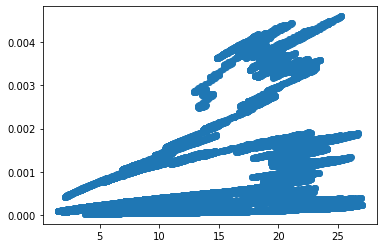

In [54]:
plt.scatter(moldi.loc[:,"Temp"], moldi.loc[:, "Growth"])

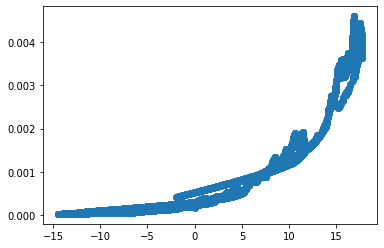

In [51]:
plt.scatter(moldi.loc[:,"RHdiff"], moldi.loc[:, "Growth"])